In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('..')

from dbn import DBN
from load_data import lire_alpha_digits

In [3]:
def random_characters(nb):
    ascii_codes_characters = list(range(ord('0'), ord('9')+1)) + list(range(ord('A'), ord('Z')+1))
    ascii_characters = np.random.choice(ascii_codes_characters, replace=False, size=nb)
    characters = [chr(code) for code in ascii_characters]
    return characters

In [4]:
def compute_params_rbm(rbm):
    return rbm.a.shape[0] + rbm.b.shape[0] + np.prod(rbm.W.shape)

def compute_params_dbn(dbn_model, print_=True, return_=False):
    nb_params_dbn = 0
    for rbm in dbn_model.rbms:
        nb_params_dbn += compute_params_rbm(rbm)
    if print_:
        print(f"nb parameters: {nb_params_dbn:,}")
    if return_:
        return nb_params_dbn

# DBN

## Varying the number of layers

In [5]:
def train_dbn(characters, L, qs, epochs=3000, nb_to_generate=20, plot_=False):
    dbn_model = DBN(X=lire_alpha_digits(characters), L=L, qs=qs)
    dbn_model.train_DBN(epochs=epochs, learning_rate=1e-3, batch_size=32)
    generated_images = dbn_model.generer_image_DBN(num_samples=nb_to_generate, gibbs_steps=1000*L, plot_=plot_)
    return dbn_model, generated_images

In [6]:
characters = random_characters(8)
print(characters)
Ls = [2, 3, 5, 7, 10]

['S', 'X', 'C', '8', '3', 'F', 'O', 'I']


In [7]:
models = []
images = []
for L in Ls:
    print(f'Training with {L} layers')
    m, i = train_dbn(characters, L, qs=[500]*L, nb_to_generate=200)
    models.append(m)
    images.append(i)

RBM 9: 100%|██████████| 10/10 [1:15:29<00:00, 452.94s/rbm, total_loss=0.12]


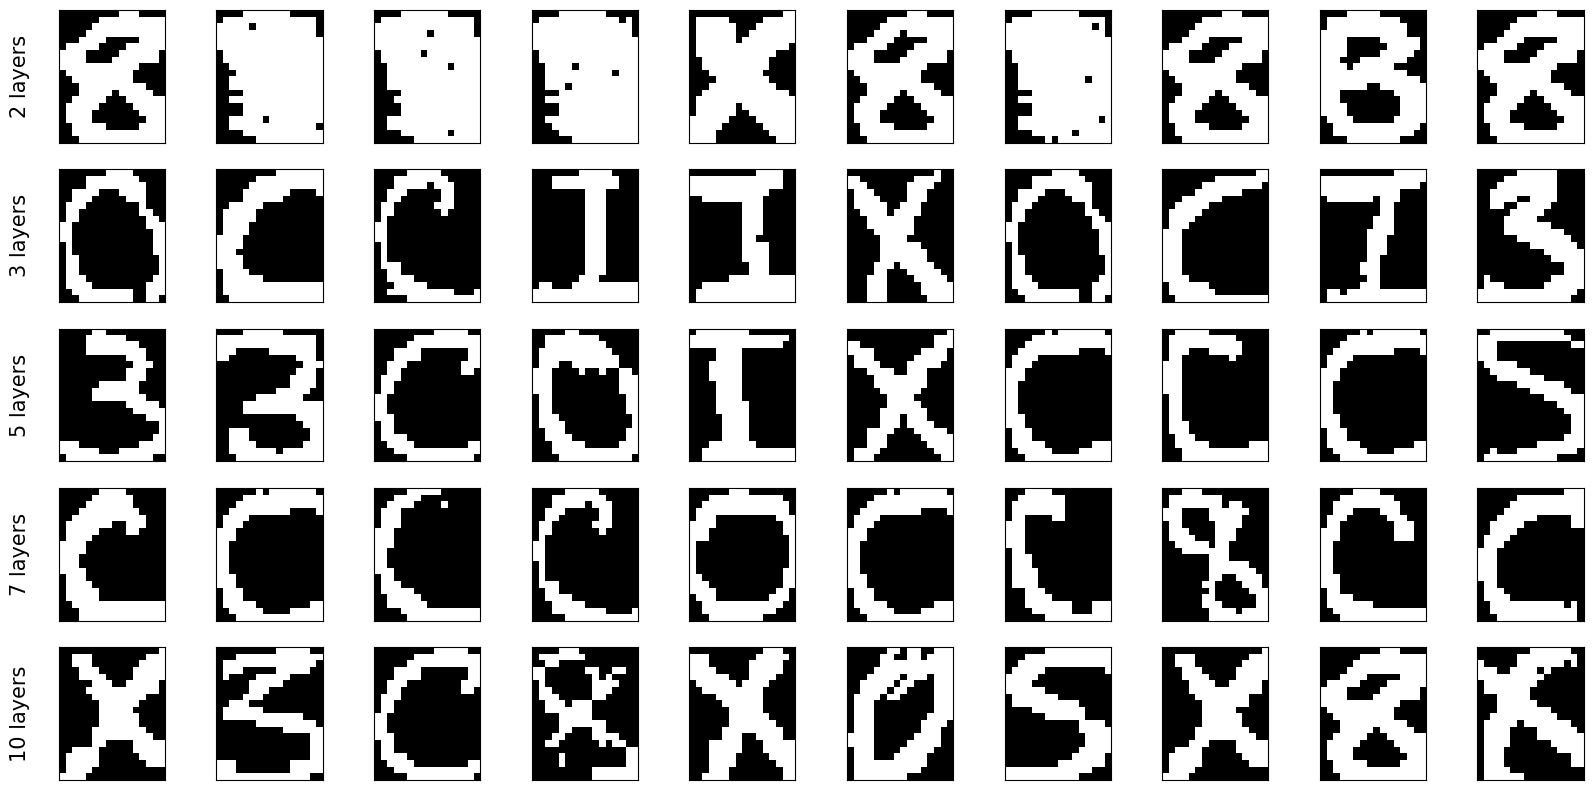

In [8]:
arrays = np.zeros_like(np.array(images)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images[i]), replace=False, size=10)
    arrays[i] = np.array(images)[i, idx]

fig, axs = plt.subplots(len(Ls), 10, figsize=(20, len(Ls)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{Ls[i]} layers\n', fontsize=15)

## Varying the number of characters

In [9]:
models_char  = []
images_char = []
nb_characters = [1, 2, 4, 8, 12, 16, 24]
L = 5

for nb_character in nb_characters:
    print(f'Training with {nb_character} characters')
    m, i = train_dbn(random_characters(nb_character), L, qs=[500]*L, nb_to_generate=200)
    models_char.append(m)
    images_char.append(i)

RBM 4: 100%|██████████| 5/5 [37:02<00:00, 444.54s/rbm, total_loss=0.0599]


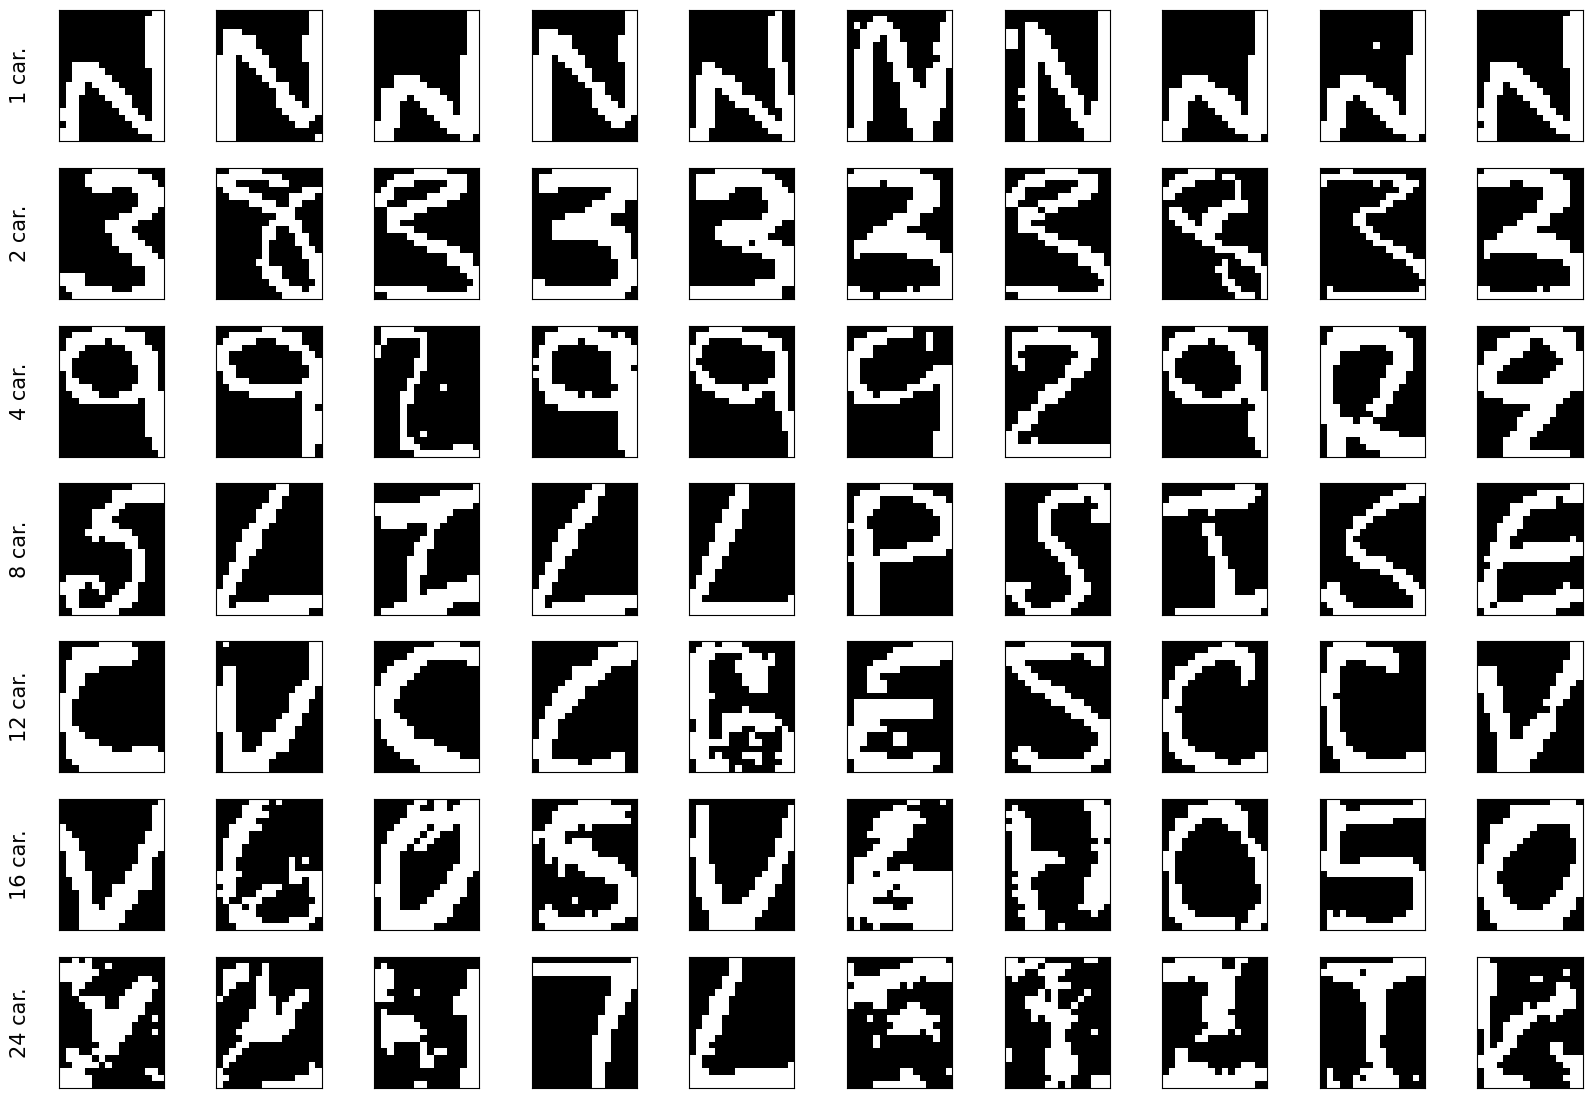

In [30]:
arrays = np.zeros_like(np.array(images_char)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images_char[i]), replace=False, size=10)
    arrays[i] = np.array(images_char)[i, idx]

fig, axs = plt.subplots(len(nb_characters), 10, figsize=(20, len(nb_characters)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_characters[i]} car.\n', fontsize=15)

## Varying the number of neurons per layer

### Each layer with same amount of neurons

In [11]:
models_s_neur  = []
images_s_neur = []
L = 5
characters = random_characters(8)
nb_neurons = [100, 200, 500, 700, 1000]

In [15]:
characters

['9', 'F', 'C', 'J', 'M', '3', 'B', '4']

In [12]:
for nb_neuron in nb_neurons:
    print(f'Training with {nb_neuron} neurons per layer')
    m, i = train_dbn(characters, L, qs=[nb_neuron]*L, nb_to_generate=200)
    models_s_neur.append(m)
    images_s_neur.append(i)

RBM 4: 100%|██████████| 5/5 [1:49:26<00:00, 1313.24s/rbm, total_loss=0.0921]


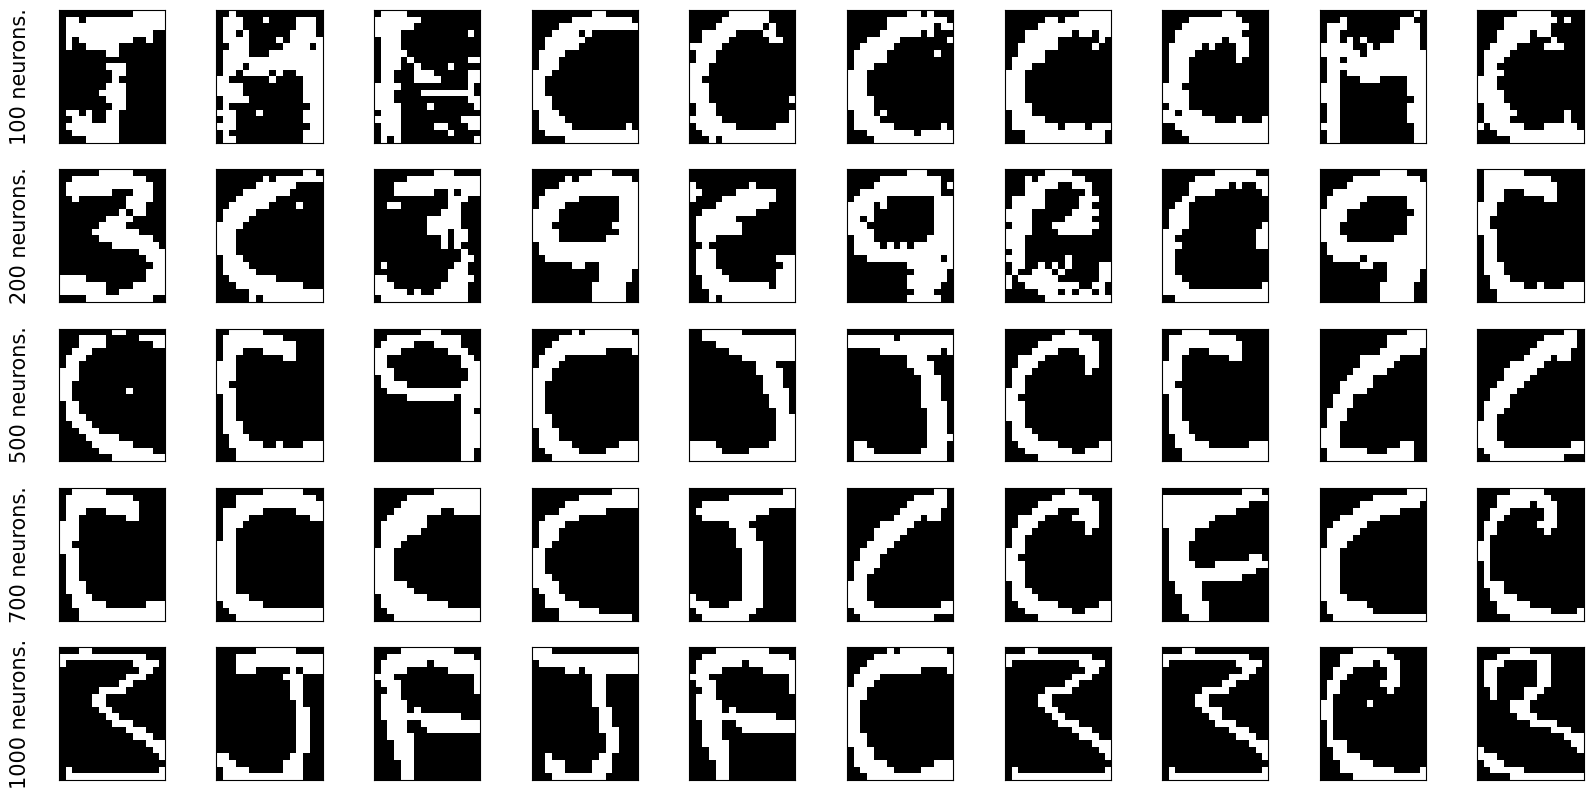

In [37]:
arrays = np.zeros_like(np.array(images_s_neur)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images_s_neur[i]), replace=False, size=10)
    arrays[i] = np.array(images_s_neur)[i, idx]

fig, axs = plt.subplots(len(nb_neurons), 10, figsize=(20, len(nb_neurons)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_neurons[i]} neurons.\n', fontsize=15)

### Bottleneck

In [38]:
models_s_neur_botn  = []
images_s_neur_botn = []
L = 5
nb_neurons_botn = [
    [500, 300, 200, 300, 500], 
    [700, 500, 300, 500, 700],
    [300, 200, 100, 200, 300],
    [500, 200, 200, 200, 500]
]

for nb_neuron in nb_neurons_botn:
    print(f'Training with {nb_neuron} neurons per layer')
    m, i = train_dbn(characters, L, qs=nb_neuron, nb_to_generate=200)
    models_s_neur_botn.append(m)
    images_s_neur_botn.append(i)

RBM 4: 100%|██████████| 5/5 [05:58<00:00, 71.67s/rbm, total_loss=0.0594]


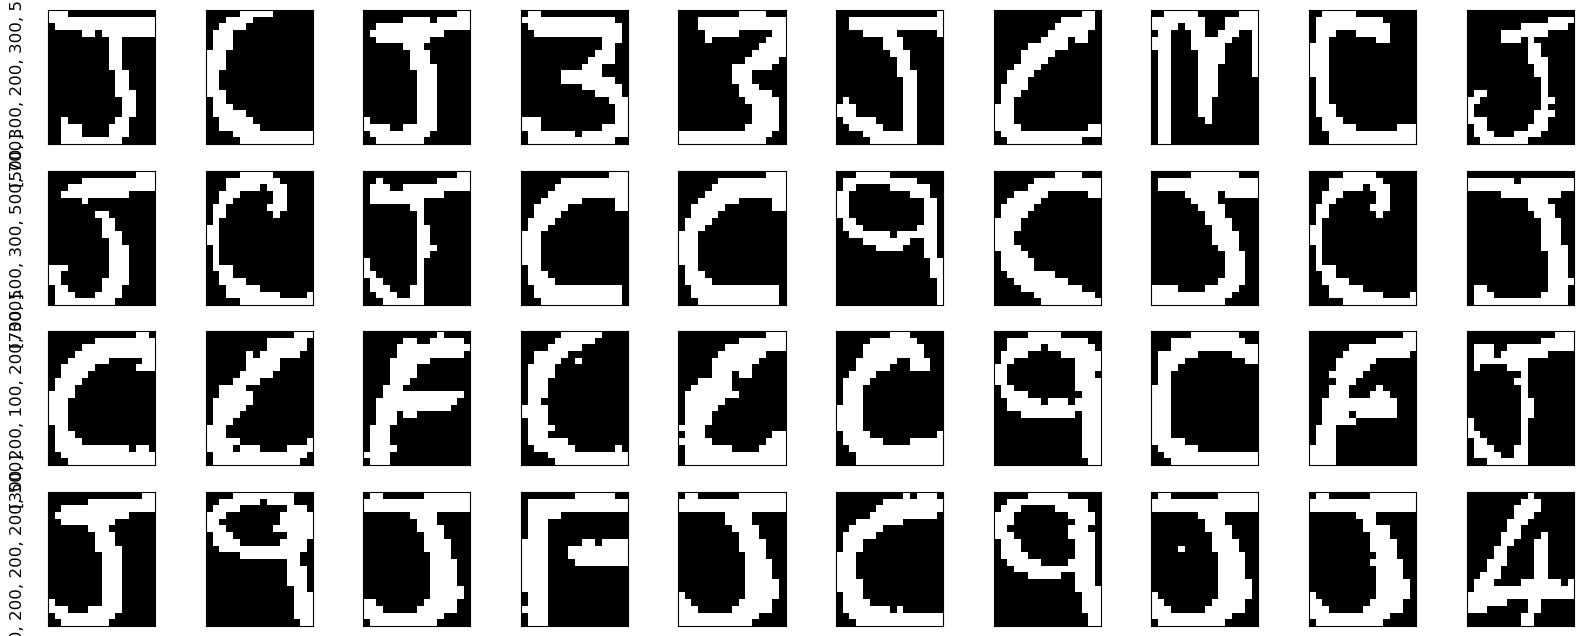

In [39]:
arrays = np.zeros_like(np.array(images_s_neur_botn)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images_s_neur_botn[i]), replace=False, size=10)
    arrays[i] = np.array(images_s_neur_botn)[i, idx]

fig, axs = plt.subplots(len(nb_neurons_botn), 10, figsize=(20, len(nb_neurons_botn)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_neurons_botn[i]}.\n', fontsize=12)